<a href="https://colab.research.google.com/github/markquark125/Summer-MicroCredentials/blob/main/KNN_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1: Identify the Problem

# Task 2: Load the Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Task 3: Load the Data

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/markquark125/ML-Data/main/KNN_Data.csv')

# Task 4: EDA (Exploratory Data Analysis)

In [5]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742175,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


## Lecture notes
 * clustering - grouping like elements together.
 * visualization of the EDA. Display how data looks vs what the data actually is.

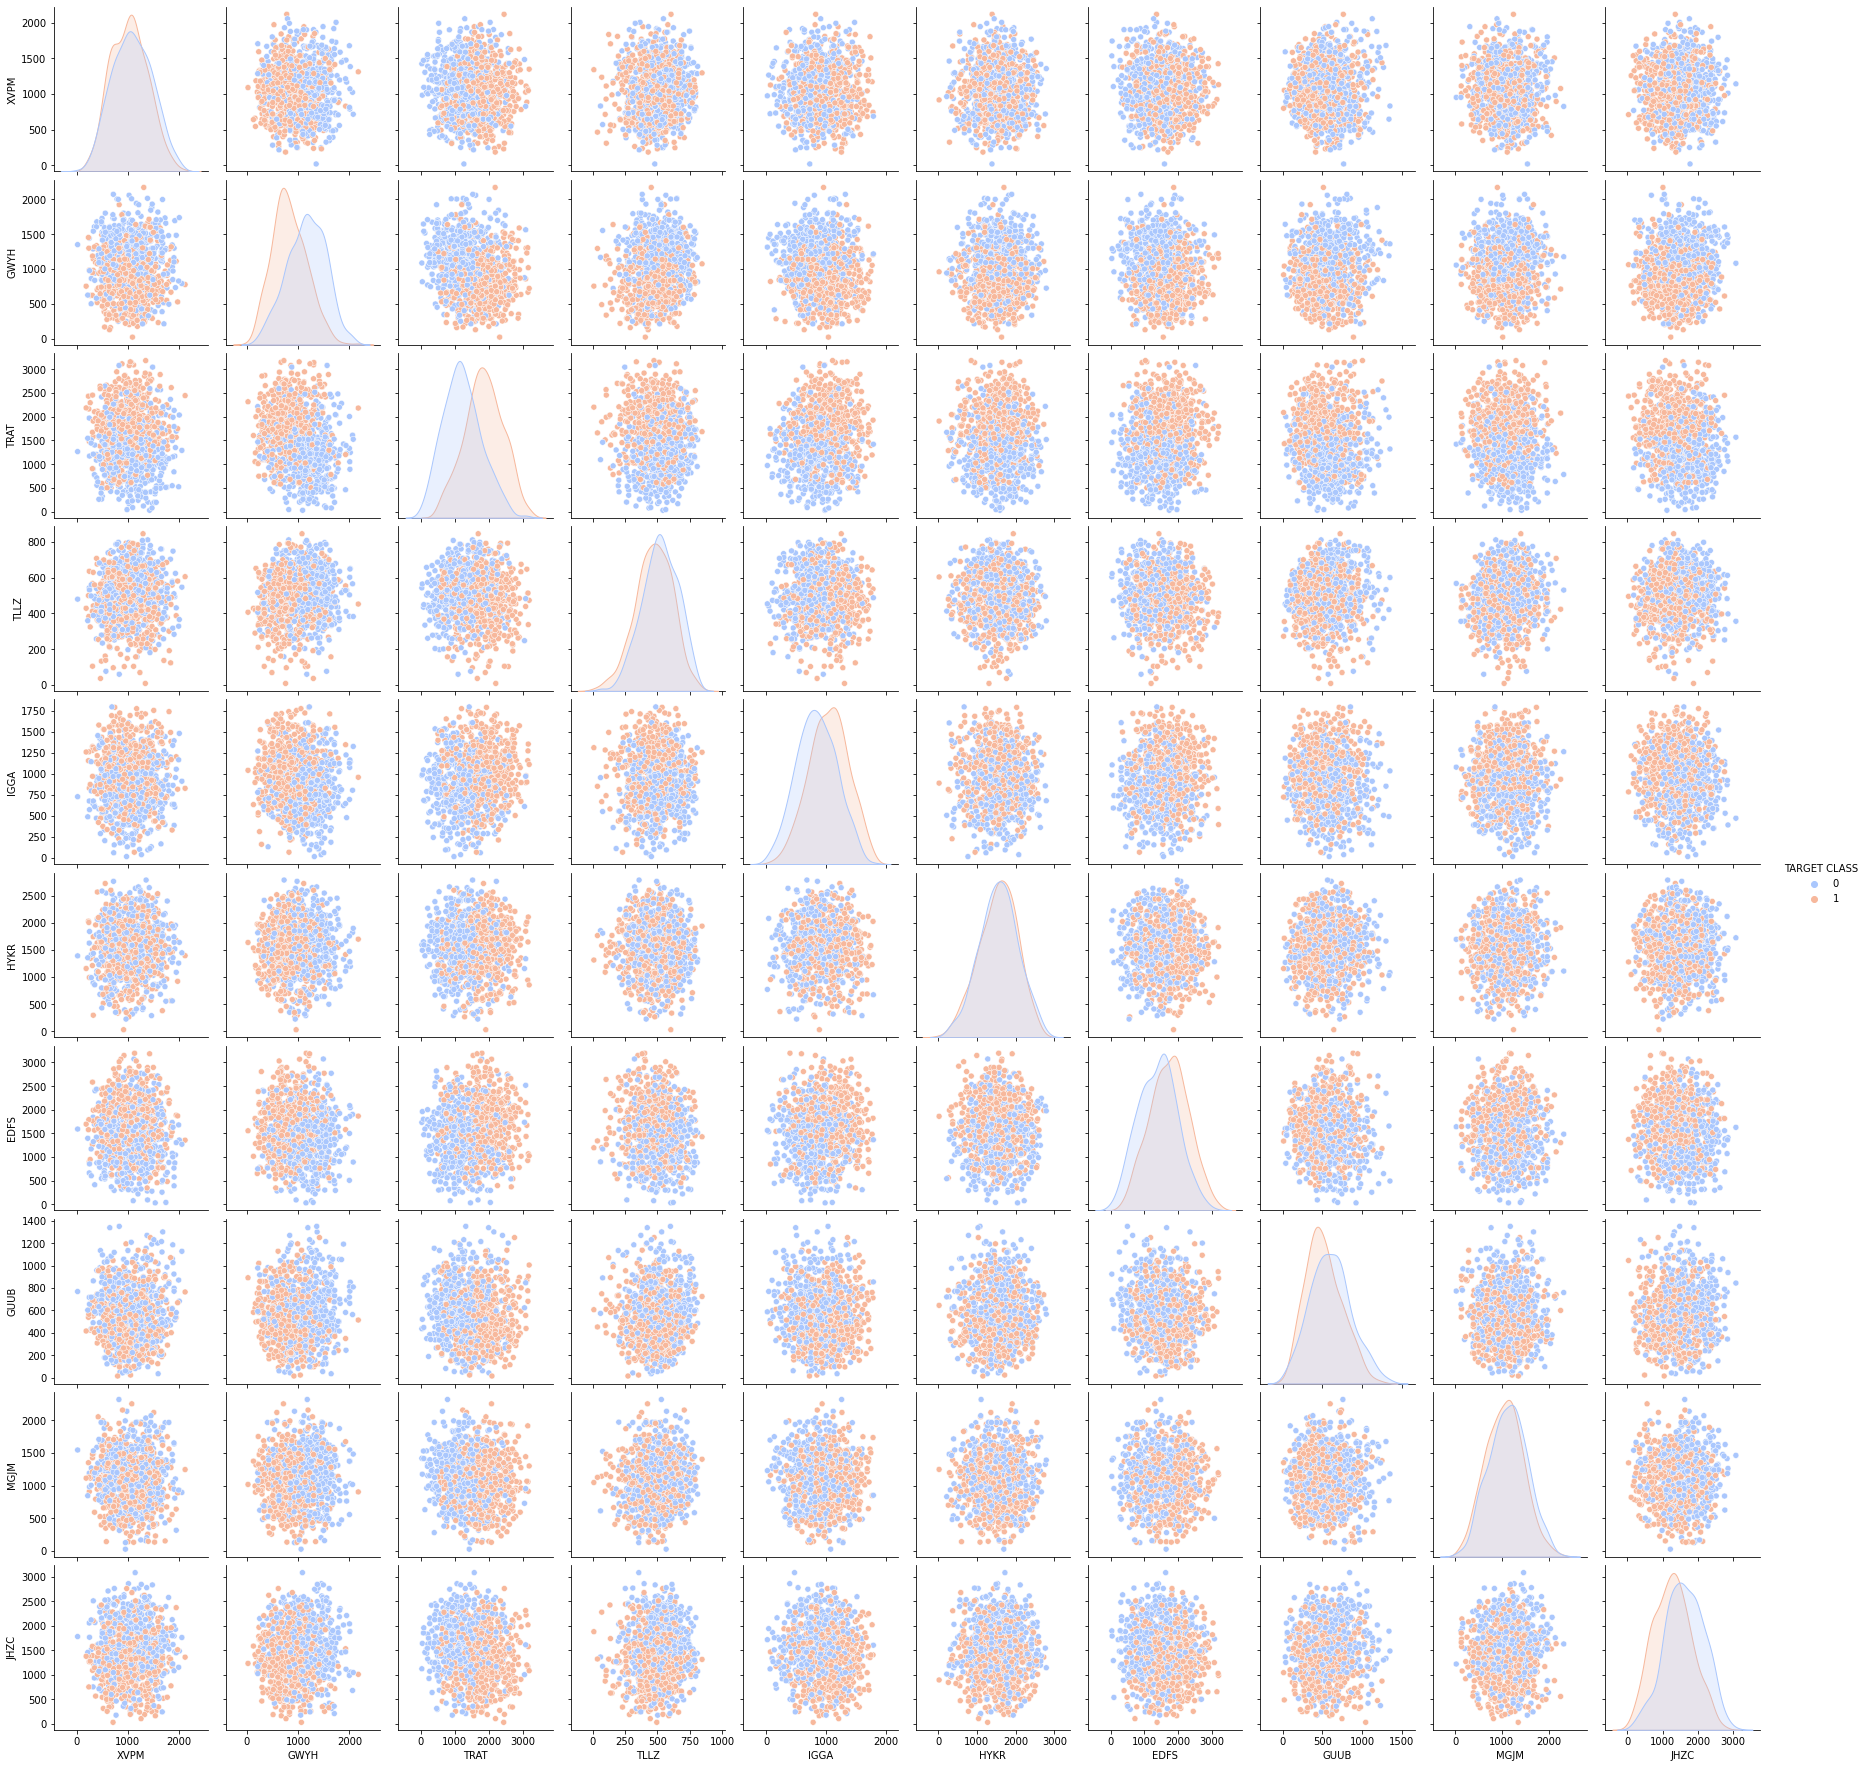

In [6]:
sns.pairplot(df,hue='TARGET CLASS', palette='coolwarm')

In [7]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742175,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [8]:
df.describe()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,1055.071157,991.851567,1529.373525,495.107156,940.590072,1550.637455,1561.003252,561.346117,1089.067338,1452.521629,0.50000
std,370.980193,392.278890,640.286092,142.789188,345.923136,493.491988,598.608517,247.357552,402.666953,568.132005,0.50025
min,21.170000,21.720000,31.800000,8.450000,17.930000,27.930000,31.960000,13.520000,23.210000,30.890000,0.00000
25%,767.413366,694.859326,1062.600807,401.788134,700.763295,1219.267077,1132.097865,381.704293,801.849802,1059.499689,0.00000
50%,1045.904806,978.355081,1522.507269,500.197421,939.348662,1564.996551,1565.882879,540.420379,1099.087954,1441.554053,0.50000
75%,1326.065178,1275.528770,1991.128626,600.525709,1182.578166,1891.937040,1981.739411,725.762027,1369.923665,1864.405512,1.00000
max,2117.000000,2172.000000,3180.000000,845.000000,1793.000000,2793.000000,3196.000000,1352.000000,2321.000000,3089.000000,1.00000


## Lecture:
* what is overfeeding and underfeeding?

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()

In [11]:
scaler.fit(df.drop('TARGET CLASS', axis=1))

StandardScaler()

In [12]:
scaled_features = scaler.transform(df.drop('TARGET CLASS', axis=1))

In [13]:
scaled_features

array([[ 1.56852168, -0.44343461,  1.61980773, ..., -0.93279392,
         1.00831307, -1.06962723],
       [-0.11237594, -1.05657361,  1.7419175 , ..., -0.46186435,
         0.25832069, -1.04154625],
       [ 0.66064691, -0.43698145,  0.77579285, ...,  1.14929806,
         2.1847836 ,  0.34281129],
       ...,
       [-0.35889496, -0.97901454,  0.83771499, ..., -1.51472604,
        -0.27512225,  0.86428656],
       [ 0.27507999, -0.99239881,  0.0303711 , ..., -0.03623294,
         0.43668516, -0.21245586],
       [ 0.62589593,  0.79510909,  1.12180047, ..., -1.25156478,
        -0.60352946, -0.87985868]])

In [14]:
df_feat = pd.DataFrame(scaled_features, columns =df.columns[:-1])

In [15]:
df_feat.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


In [16]:
df_feat.describe()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,-2.930989e-17,-2.104983e-16,-2.522427e-16,1.030287e-16,1.065814e-17,7.460699e-17,8.881784e-17,-2.930989e-16,4.263256e-17,3.996803e-17
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-2.788339e+00,-2.474303e+00,-2.340083e+00,-3.409927e+00,-2.668575e+00,-3.087121e+00,-2.555607e+00,-2.215822e+00,-2.648319e+00,-2.503543e+00
25%,-7.757873e-01,-7.574735e-01,-7.293713e-01,-6.538711e-01,-6.936419e-01,-6.718168e-01,-7.168625e-01,-7.266069e-01,-7.136450e-01,-6.921254e-01
50%,-2.472083e-02,-3.442255e-02,-1.072910e-02,3.566665e-02,-3.590482e-03,2.911148e-02,8.155695e-03,-8.463946e-02,2.489807e-02,-1.931429e-02
75%,7.308466e-01,7.235137e-01,7.215308e-01,7.386505e-01,6.998930e-01,6.919471e-01,7.032086e-01,6.650219e-01,6.978394e-01,7.253420e-01
max,2.863927e+00,3.009948e+00,2.579241e+00,2.451642e+00,2.465393e+00,2.518753e+00,2.732696e+00,3.198000e+00,3.060964e+00,2.881896e+00


In [32]:
from sklearn.model_selection import train_test_split

In [46]:
X_train,X_test, y_train, y_test = train_test_split(scaled_features, df['TARGET CLASS'], test_size=0.33)
# note that random= is not an arguement.

In [47]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

ALL NOTEBOOKS: decision treee, knn, logistic regression, random forest

In [48]:
pred = knn.predict(X_test)

In [49]:
from sklearn.metrics import classification_report, confusion_matrix

In [50]:
print(confusion_matrix(y_test,pred))

[[105  64]
 [ 34 127]]


In [51]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.76      0.62      0.68       169
           1       0.66      0.79      0.72       161

    accuracy                           0.70       330
   macro avg       0.71      0.71      0.70       330
weighted avg       0.71      0.70      0.70       330



In [52]:
error_rate = []
# Will take some time
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [53]:
error_rate

[0.296969696969697,
 0.25757575757575757,
 0.2545454545454545,
 0.23333333333333334,
 0.24545454545454545,
 0.22727272727272727,
 0.23333333333333334,
 0.22424242424242424,
 0.23333333333333334,
 0.20909090909090908,
 0.22121212121212122,
 0.2,
 0.20909090909090908,
 0.20909090909090908,
 0.20606060606060606,
 0.19696969696969696,
 0.2,
 0.2,
 0.20909090909090908,
 0.20606060606060606,
 0.20606060606060606,
 0.20606060606060606,
 0.21212121212121213,
 0.2,
 0.19696969696969696,
 0.19696969696969696,
 0.20606060606060606,
 0.20606060606060606,
 0.21212121212121213,
 0.20606060606060606,
 0.20303030303030303,
 0.20303030303030303,
 0.20909090909090908,
 0.20606060606060606,
 0.20303030303030303,
 0.19393939393939394,
 0.19090909090909092,
 0.19696969696969696,
 0.20303030303030303]

Text(0, 0.5, 'Error Rate')

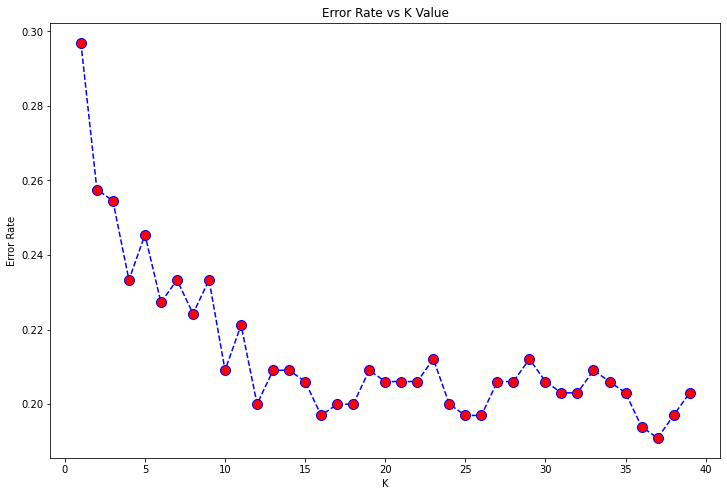

In [54]:
plt.figure(figsize=(12,8))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [55]:
knn = KNeighborsClassifier(n_neighbors=20)

In [56]:
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

In [57]:
print('With k = 20')
print(confusion_matrix(y_test,pred))

With k = 20
[[132  37]
 [ 31 130]]


In [58]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.81      0.78      0.80       169
           1       0.78      0.81      0.79       161

    accuracy                           0.79       330
   macro avg       0.79      0.79      0.79       330
weighted avg       0.79      0.79      0.79       330



In [60]:
knn = KNeighborsClassifier(n_neighbors=29)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print('With k = 29')
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

With k = 29
[[126  43]
 [ 27 134]]
              precision    recall  f1-score   support

           0       0.82      0.75      0.78       169
           1       0.76      0.83      0.79       161

    accuracy                           0.79       330
   macro avg       0.79      0.79      0.79       330
weighted avg       0.79      0.79      0.79       330



As K increases, accuracy changes. See how K = 20 is more accurate than K = 29.

# Task 5: Data Visualization

# Task 6: Compute the Cost Function

# Task 7: Compute the Gradient Descent

# Task 8: 

# Task 9: Conduct The Linear Regression on the Data

# Task 10: Making Predictions